# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
                                                                      
import os
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import random
import seaborn as sns
import pickle
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
for dirname,_,filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\WA_Fn-UseC_-Telco-Customer-Churn.csv


# Data Loading

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Preprocessing

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df = df.drop(labels='customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for feature in df.columns:
    print(f"Feature: {feature:<20} | Number of Null Values: {df[feature].isnull().sum()}")

Feature: gender               | Number of Null Values: 0
Feature: SeniorCitizen        | Number of Null Values: 0
Feature: Partner              | Number of Null Values: 0
Feature: Dependents           | Number of Null Values: 0
Feature: tenure               | Number of Null Values: 0
Feature: PhoneService         | Number of Null Values: 0
Feature: MultipleLines        | Number of Null Values: 0
Feature: InternetService      | Number of Null Values: 0
Feature: OnlineSecurity       | Number of Null Values: 0
Feature: OnlineBackup         | Number of Null Values: 0
Feature: DeviceProtection     | Number of Null Values: 0
Feature: TechSupport          | Number of Null Values: 0
Feature: StreamingTV          | Number of Null Values: 0
Feature: StreamingMovies      | Number of Null Values: 0
Feature: Contract             | Number of Null Values: 0
Feature: PaperlessBilling     | Number of Null Values: 0
Feature: PaymentMethod        | Number of Null Values: 0
Feature: MonthlyCharges       |

In [8]:
for feature in df.columns:
    print(f"Feature: {feature:<20} | Number of unique data points: {len(df[feature].unique().tolist())}")

Feature: gender               | Number of unique data points: 2
Feature: SeniorCitizen        | Number of unique data points: 2
Feature: Partner              | Number of unique data points: 2
Feature: Dependents           | Number of unique data points: 2
Feature: tenure               | Number of unique data points: 73
Feature: PhoneService         | Number of unique data points: 2
Feature: MultipleLines        | Number of unique data points: 3
Feature: InternetService      | Number of unique data points: 3
Feature: OnlineSecurity       | Number of unique data points: 3
Feature: OnlineBackup         | Number of unique data points: 3
Feature: DeviceProtection     | Number of unique data points: 3
Feature: TechSupport          | Number of unique data points: 3
Feature: StreamingTV          | Number of unique data points: 3
Feature: StreamingMovies      | Number of unique data points: 3
Feature: Contract             | Number of unique data points: 3
Feature: PaperlessBilling     | Number 

In [9]:
object_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(object_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [10]:
df[object_features].head(10)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes
6,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1949.4,No
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,301.9,No
8,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),3487.95,No


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numerical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [12]:
df[numerical_features].head(10)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
5,0,8,99.65
6,0,22,89.10
7,0,10,29.75
8,0,28,104.80
9,0,62,56.15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df['TotalCharges'].unique().tolist()

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [15]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else np.nan)

In [16]:
df['TotalCharges'].unique().tolist()

[29.85,
 1889.5,
 108.15,
 1840.75,
 151.65,
 820.5,
 1949.4,
 301.9,
 3046.05,
 3487.95,
 587.45,
 326.8,
 5681.1,
 5036.3,
 2686.05,
 7895.15,
 1022.95,
 7382.25,
 528.35,
 1862.9,
 39.65,
 202.25,
 20.15,
 3505.1,
 2970.3,
 1530.6,
 4749.15,
 30.2,
 6369.45,
 1093.1,
 6766.95,
 181.65,
 1874.45,
 20.2,
 45.25,
 7251.7,
 316.9,
 3548.3,
 3549.25,
 1105.4,
 475.7,
 4872.35,
 418.25,
 4861.45,
 981.45,
 3906.7,
 97.0,
 144.15,
 4217.8,
 4254.1,
 3838.75,
 1426.4,
 1752.65,
 633.3,
 4456.35,
 1752.55,
 6311.2,
 7076.35,
 894.3,
 7853.7,
 4707.1,
 5450.7,
 2962.0,
 957.1,
 857.25,
 244.1,
 3650.35,
 2497.2,
 930.9,
 887.35,
 49.05,
 1090.65,
 7099.0,
 1424.6,
 177.4,
 6139.5,
 2688.85,
 482.25,
 2111.3,
 1216.6,
 79.35,
 565.35,
 496.9,
 4327.5,
 973.35,
 918.75,
 2215.45,
 1057.0,
 927.1,
 1009.25,
 2570.2,
 74.7,
 5714.25,
 7107.0,
 7459.05,
 927.35,
 4748.7,
 113.85,
 1107.2,
 2514.5,
 19.45,
 3605.6,
 3027.25,
 7611.85,
 100.2,
 7303.05,
 927.65,
 3921.3,
 1363.25,
 5238.9,
 3042.25,

In [17]:
for feature in df.columns:
    print(f"Feature: {feature:<25} | Number of Null Values: {df[feature].isnull().sum()}")

Feature: gender                    | Number of Null Values: 0
Feature: SeniorCitizen             | Number of Null Values: 0
Feature: Partner                   | Number of Null Values: 0
Feature: Dependents                | Number of Null Values: 0
Feature: tenure                    | Number of Null Values: 0
Feature: PhoneService              | Number of Null Values: 0
Feature: MultipleLines             | Number of Null Values: 0
Feature: InternetService           | Number of Null Values: 0
Feature: OnlineSecurity            | Number of Null Values: 0
Feature: OnlineBackup              | Number of Null Values: 0
Feature: DeviceProtection          | Number of Null Values: 0
Feature: TechSupport               | Number of Null Values: 0
Feature: StreamingTV               | Number of Null Values: 0
Feature: StreamingMovies           | Number of Null Values: 0
Feature: Contract                  | Number of Null Values: 0
Feature: PaperlessBilling          | Number of Null Values: 0
Feature:

In [18]:
df = df.dropna().reset_index(drop=True)

for feature in df.columns:
    print(f"Feature: {feature:<25} | Number of Null Values: {df[feature].isnull().sum()}")

Feature: gender                    | Number of Null Values: 0
Feature: SeniorCitizen             | Number of Null Values: 0
Feature: Partner                   | Number of Null Values: 0
Feature: Dependents                | Number of Null Values: 0
Feature: tenure                    | Number of Null Values: 0
Feature: PhoneService              | Number of Null Values: 0
Feature: MultipleLines             | Number of Null Values: 0
Feature: InternetService           | Number of Null Values: 0
Feature: OnlineSecurity            | Number of Null Values: 0
Feature: OnlineBackup              | Number of Null Values: 0
Feature: DeviceProtection          | Number of Null Values: 0
Feature: TechSupport               | Number of Null Values: 0
Feature: StreamingTV               | Number of Null Values: 0
Feature: StreamingMovies           | Number of Null Values: 0
Feature: Contract                  | Number of Null Values: 0
Feature: PaperlessBilling          | Number of Null Values: 0
Feature:

In [19]:
object_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(object_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [20]:
object_df = df[object_features]
object_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


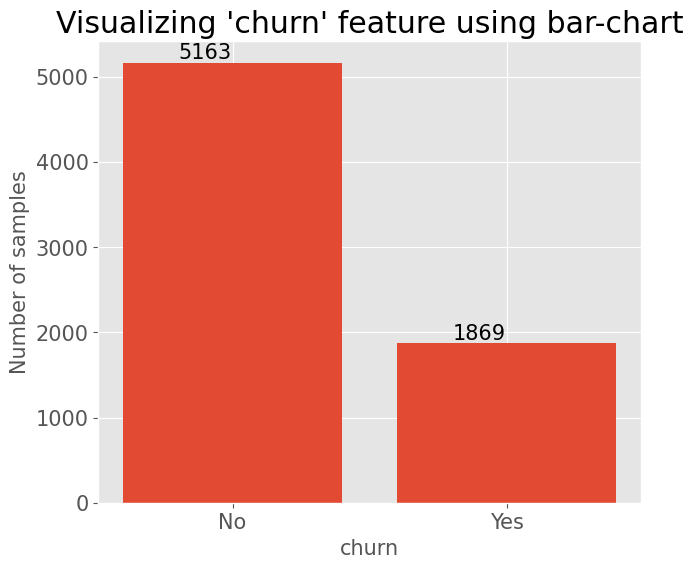

In [21]:
chart_df = dict(df['Churn'].value_counts())
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(7,6))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="Visualizing 'churn' feature using bar-chart")
    plt.xlabel(xlabel='churn', fontsize=15)
    plt.ylabel(ylabel='Number of samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for bar, count in zip(bars, chart_df.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), ha='center', va='bottom')
    plt.show()

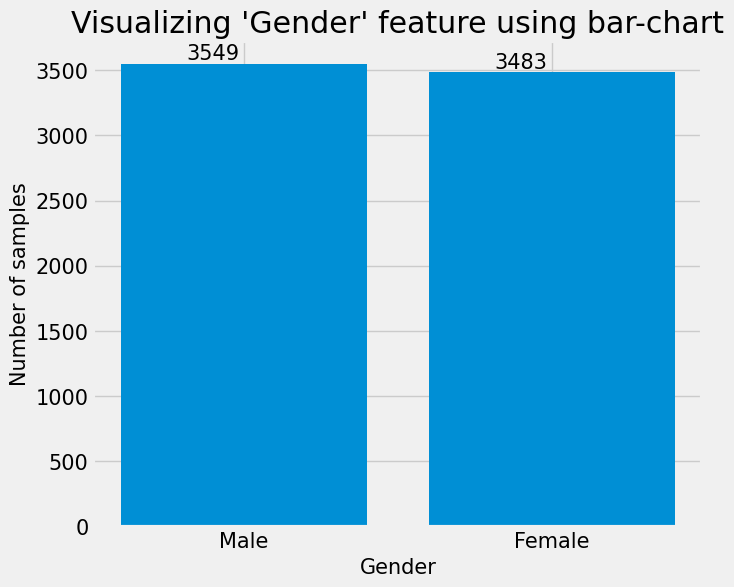

In [22]:
chart_df = dict(df['gender'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(7,6))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="Visualizing 'Gender' feature using bar-chart")
    plt.xlabel(xlabel='Gender', fontsize=15)
    plt.ylabel(ylabel='Number of samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for bar, count in zip(bars, chart_df.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), ha='center', va='bottom')
    plt.show()

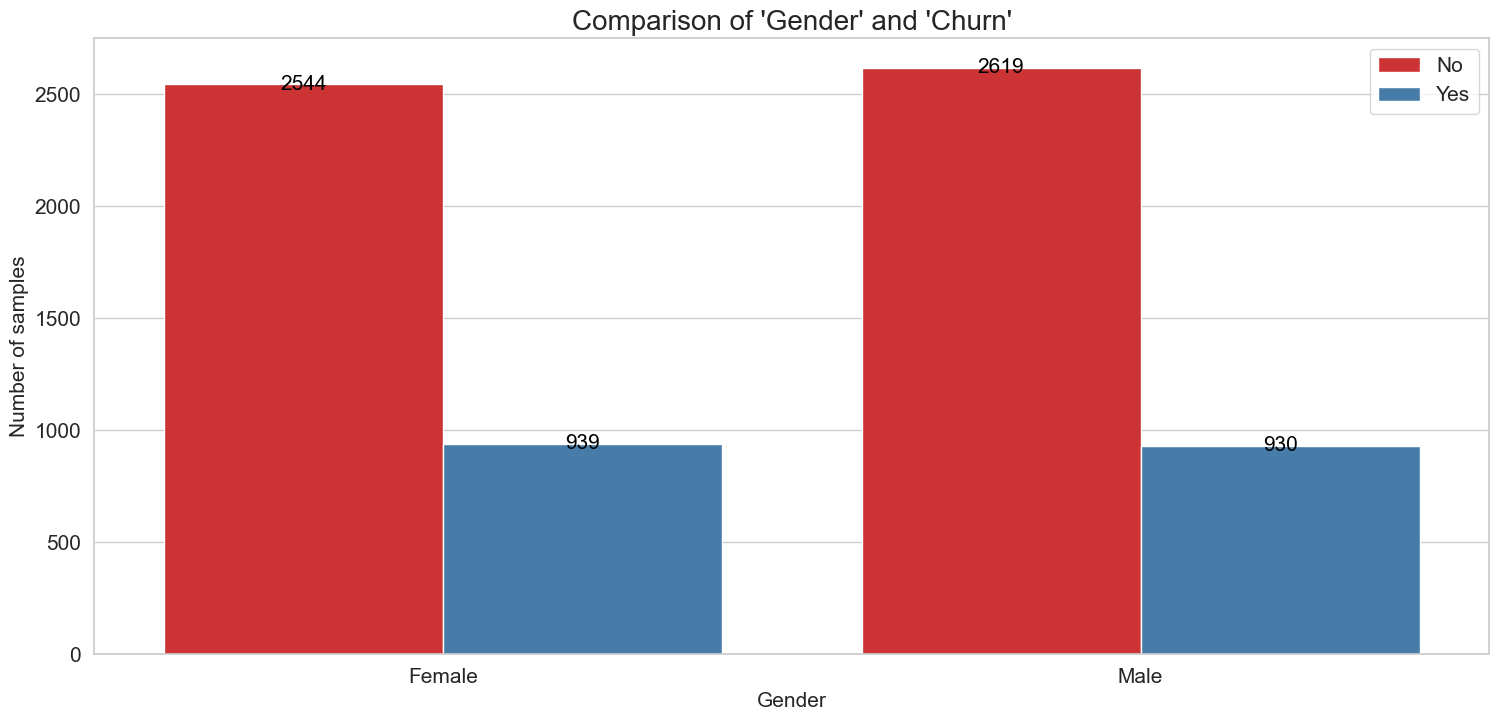

In [23]:
chart_df = df[['gender', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="gender", hue="Churn", palette="Set1")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'Gender' and 'Churn'", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

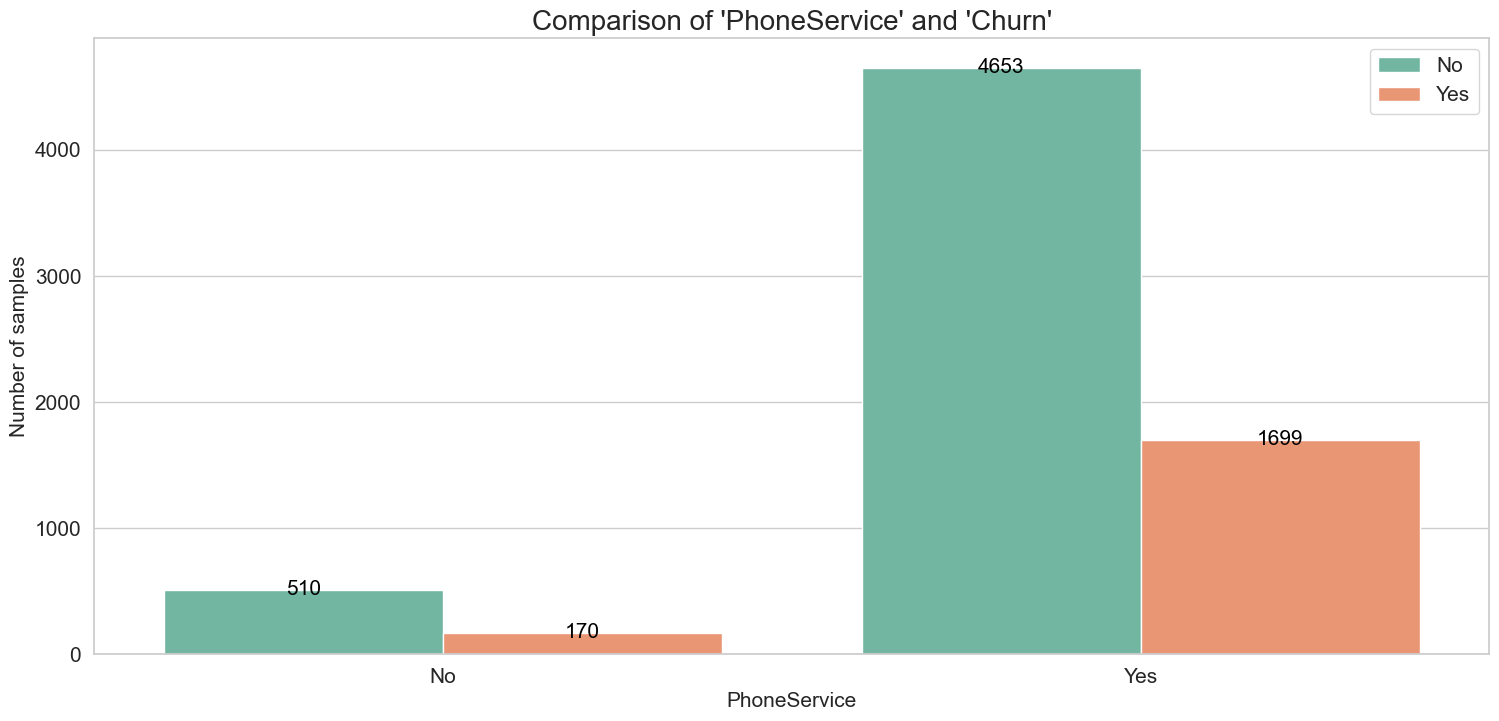

In [24]:
chart_df = df[['PhoneService', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="PhoneService", hue="Churn", palette="Set2")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'PhoneService' and 'Churn'", fontsize=20)
plt.xlabel("PhoneService", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

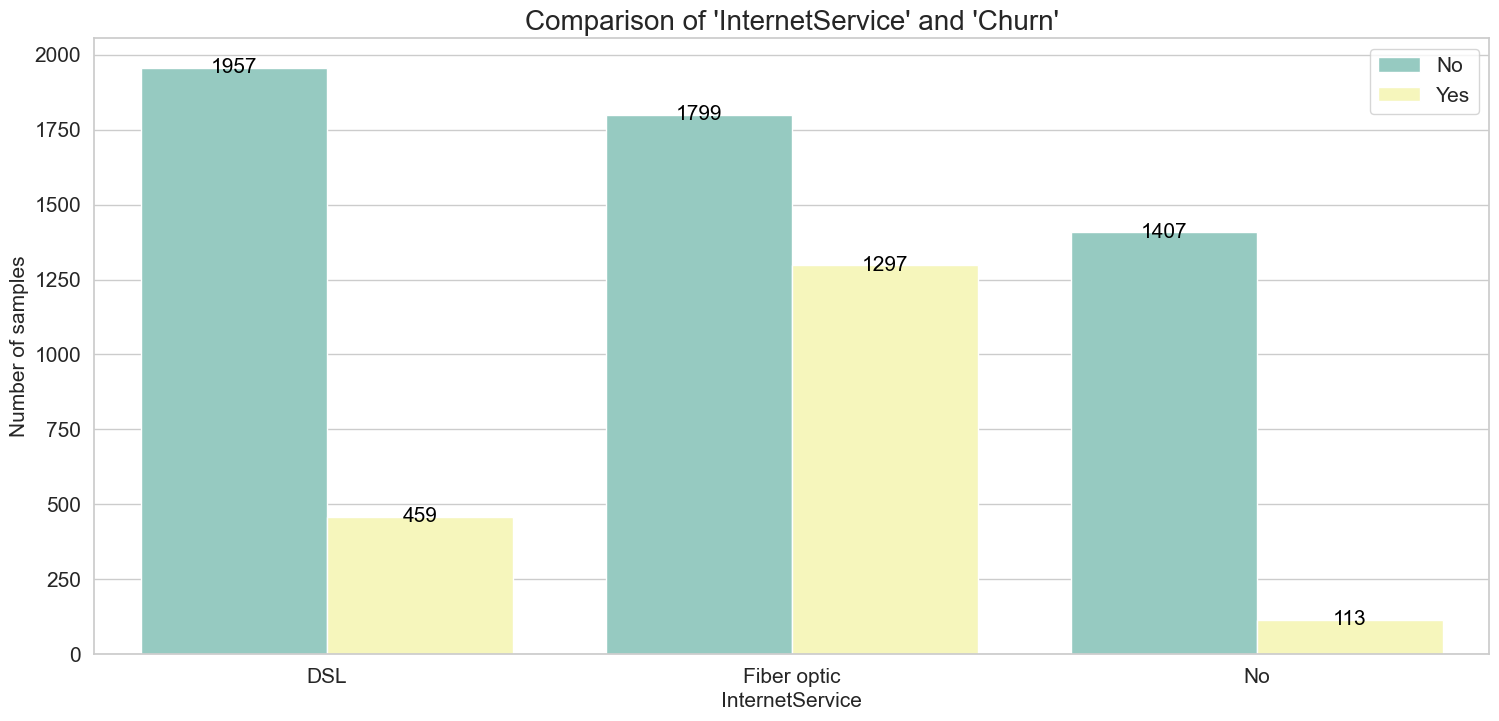

In [25]:
chart_df = df[['InternetService', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="InternetService", hue="Churn", palette="Set3")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'InternetService' and 'Churn'", fontsize=20)
plt.xlabel("InternetService", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

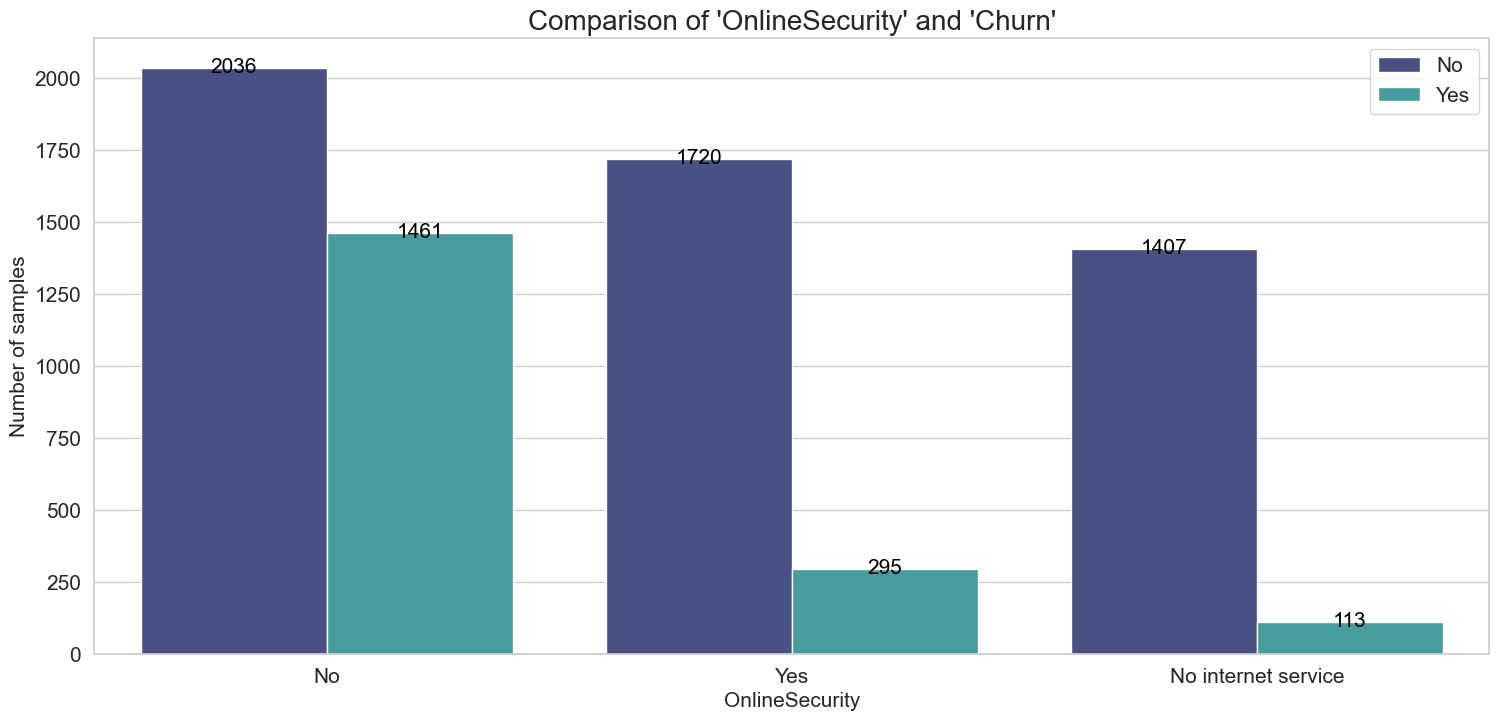

In [26]:
chart_df = df[['OnlineSecurity', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="OnlineSecurity", hue="Churn", palette="mako")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'OnlineSecurity' and 'Churn'", fontsize=20)
plt.xlabel("OnlineSecurity", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

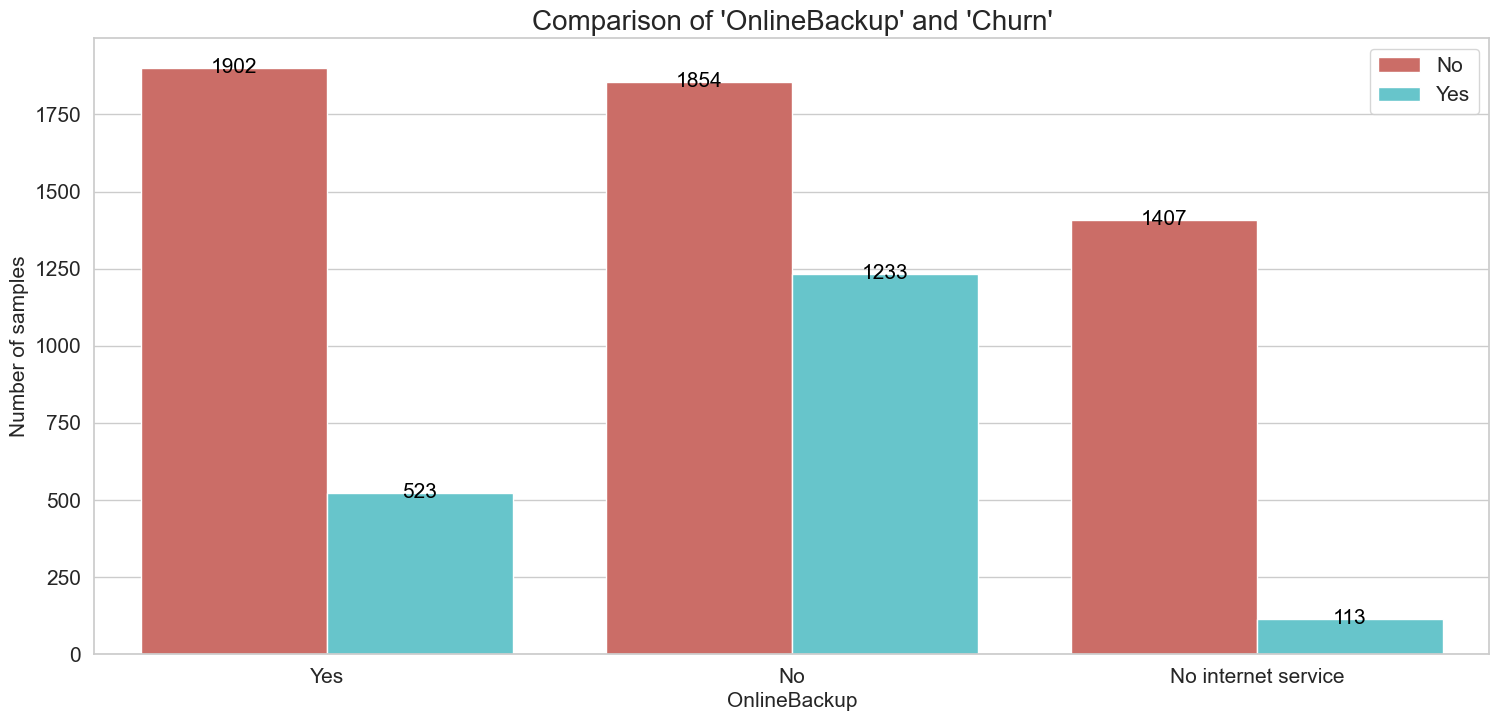

In [27]:
chart_df = df[['OnlineBackup', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="OnlineBackup", hue="Churn", palette="hls")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'OnlineBackup' and 'Churn'", fontsize=20)
plt.xlabel("OnlineBackup", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

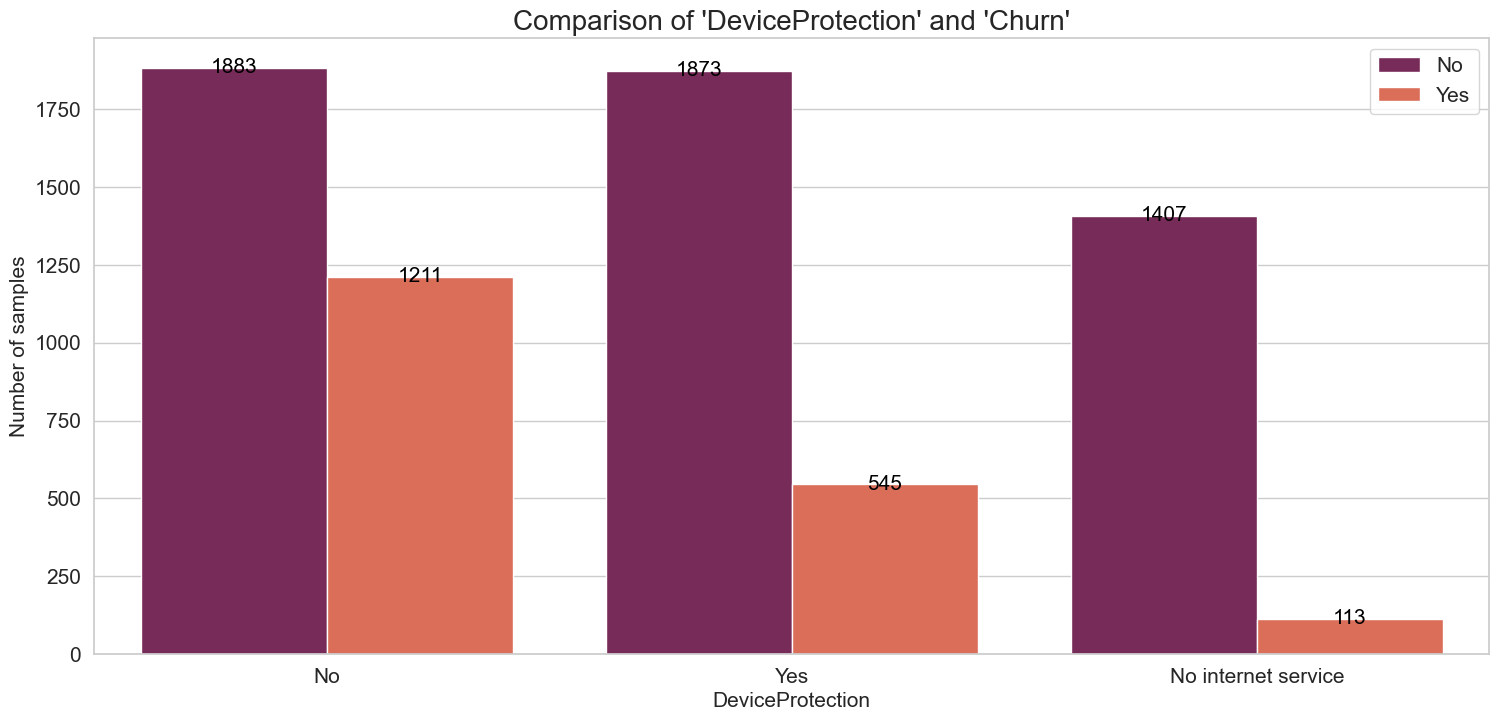

In [28]:
chart_df = df[['DeviceProtection', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="DeviceProtection", hue="Churn", palette="rocket")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'DeviceProtection' and 'Churn'", fontsize=20)
plt.xlabel("DeviceProtection", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

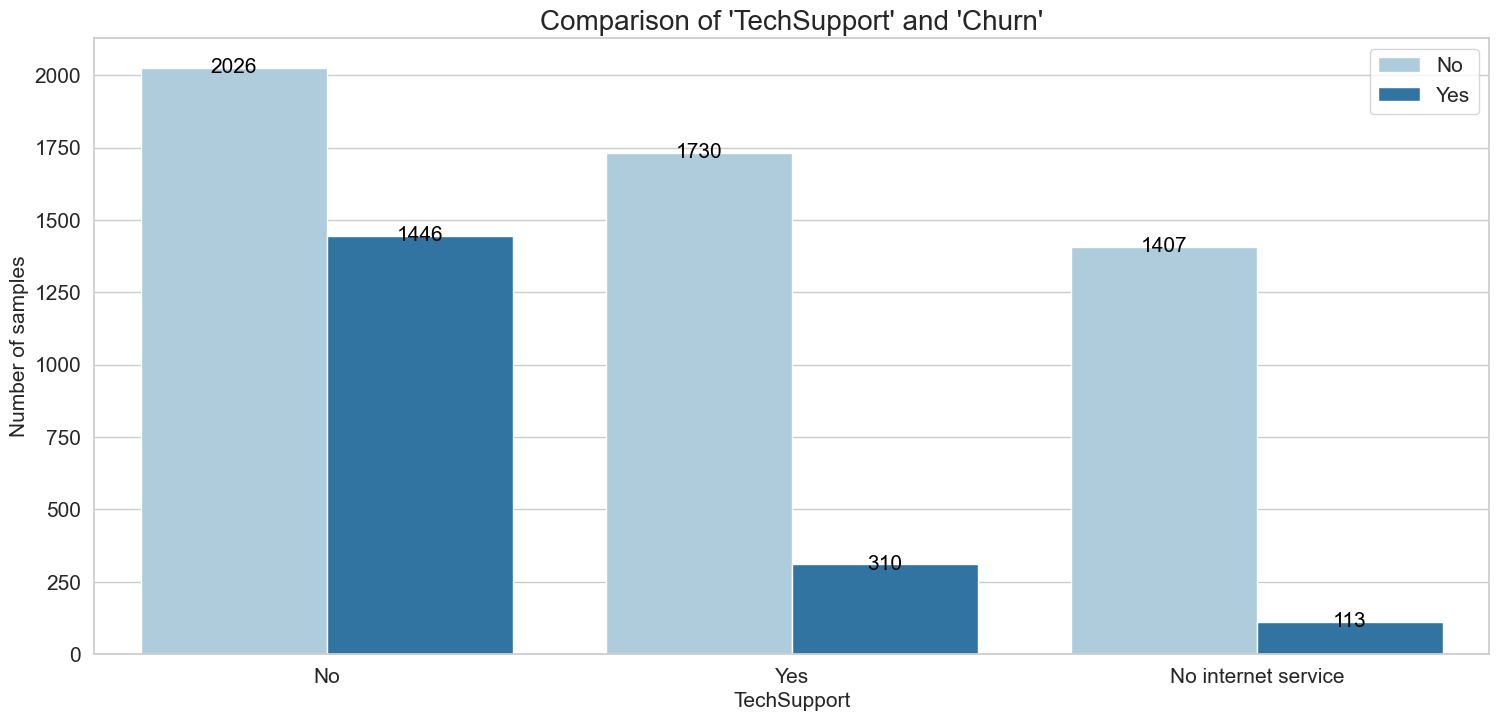

In [29]:
chart_df = df[['TechSupport', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="TechSupport", hue="Churn", palette="Paired")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'TechSupport' and 'Churn'", fontsize=20)
plt.xlabel("TechSupport", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

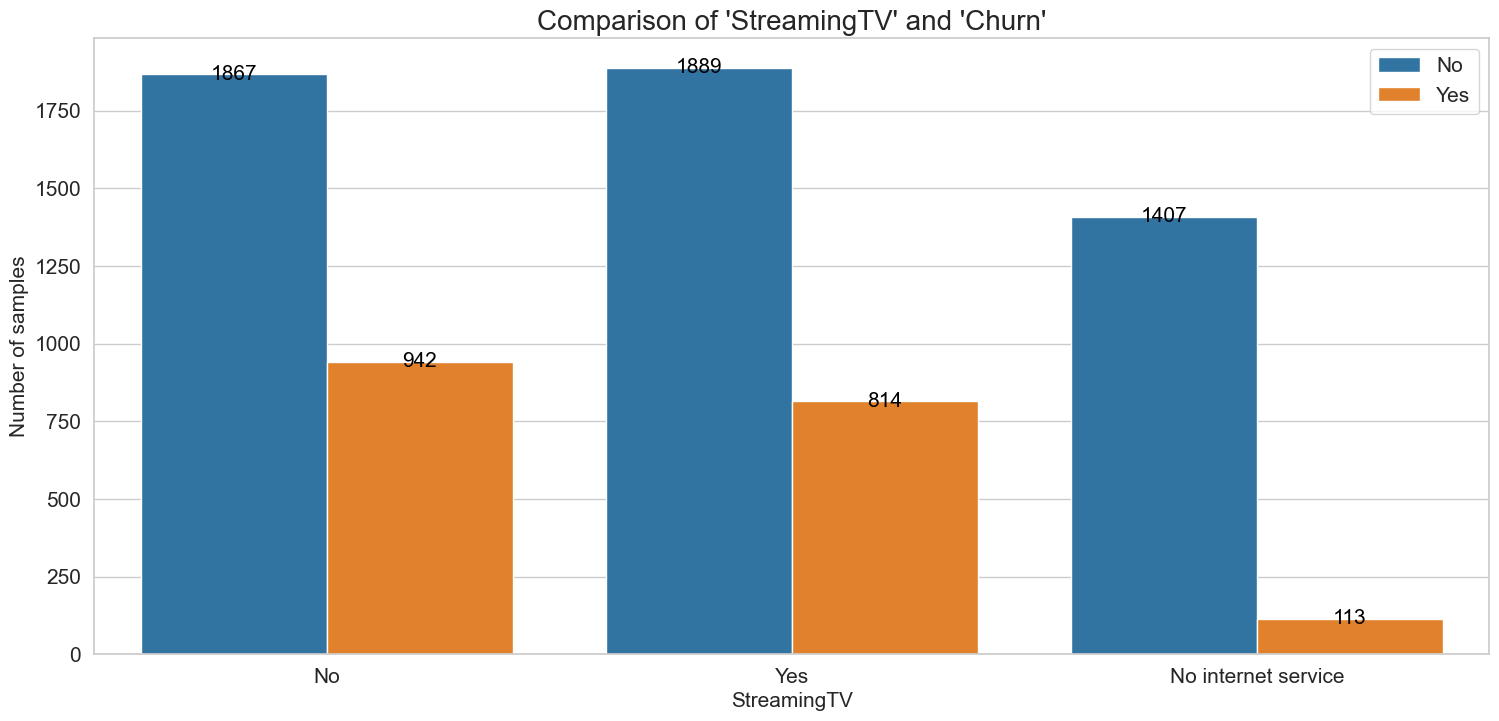

In [30]:
chart_df = df[['StreamingTV', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="StreamingTV", hue="Churn", palette="tab10")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'StreamingTV' and 'Churn'", fontsize=20)
plt.xlabel("StreamingTV", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

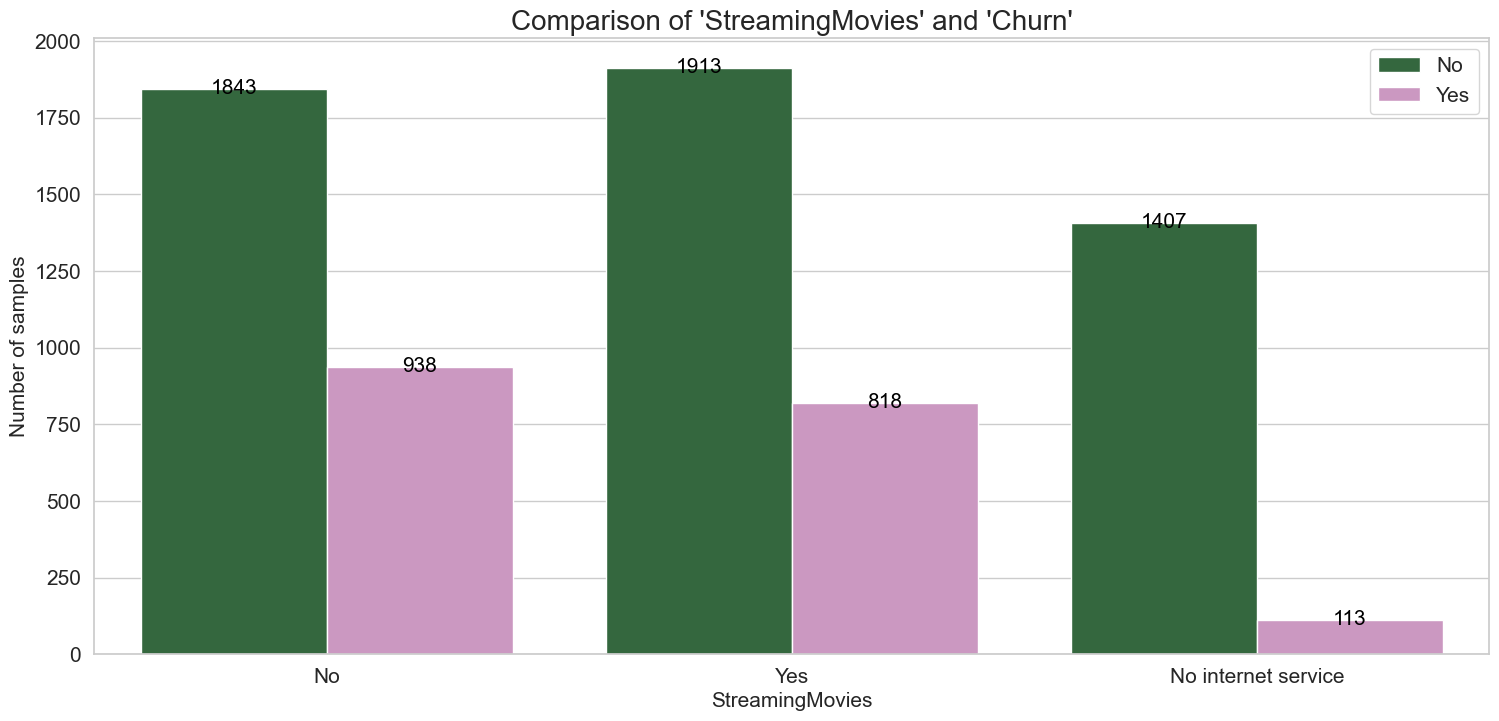

In [31]:
chart_df = df[['StreamingMovies', 'Churn']]
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
sns.countplot(data=chart_df, x="StreamingMovies", hue="Churn", palette="cubehelix")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+2), ha='center', va='center', fontsize=15, color='black')
plt.title("Comparison of 'StreamingMovies' and 'Churn'", fontsize=20)
plt.xlabel("StreamingMovies", fontsize=15)
plt.ylabel("Number of samples", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

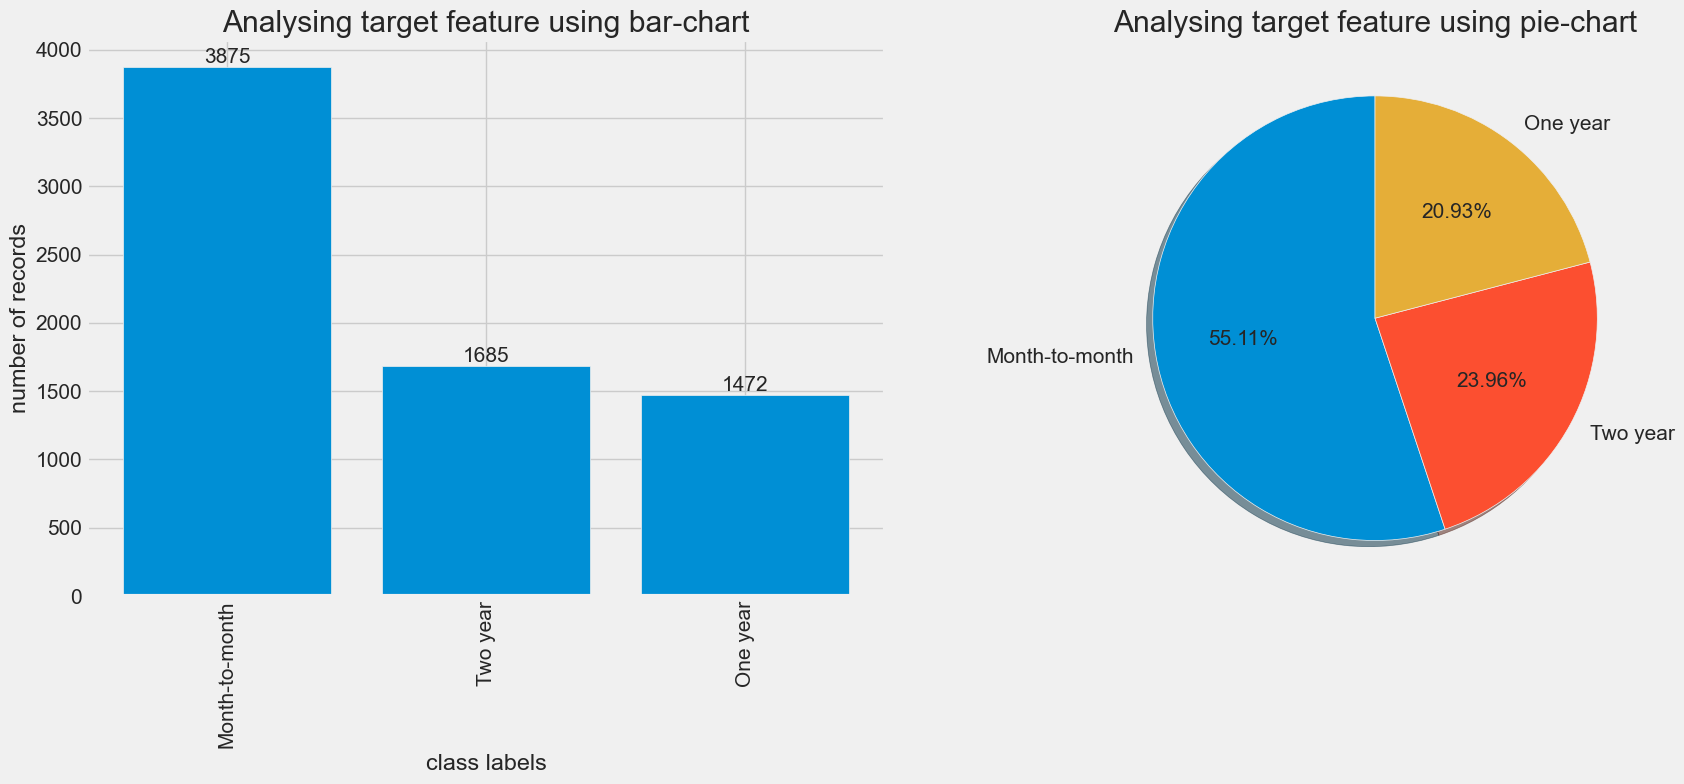

In [32]:
viz_data = dict(df['Contract'].value_counts())

with plt.style.context(style='fivethirtyeight'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    plt.rcParams['font.size'] = 15

    bars = axes[0].bar(x=list(viz_data.keys()), height=list(viz_data.values()))

    axes[0].set_title(label='Analysing target feature using bar-chart')
    axes[0].set_xlabel(xlabel='class labels')
    axes[0].set_ylabel(ylabel='number of records')

    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)

    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
    axes[0].tick_params(axis='both', which='both', labelsize=15)
    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True,
                textprops={'fontsize': 15})
    axes[1].set_title(label='Analysing target feature using pie-chart')
    axes[1].tick_params(axis='both', which='both', labelsize=15)

fig.tight_layout()
plt.show()

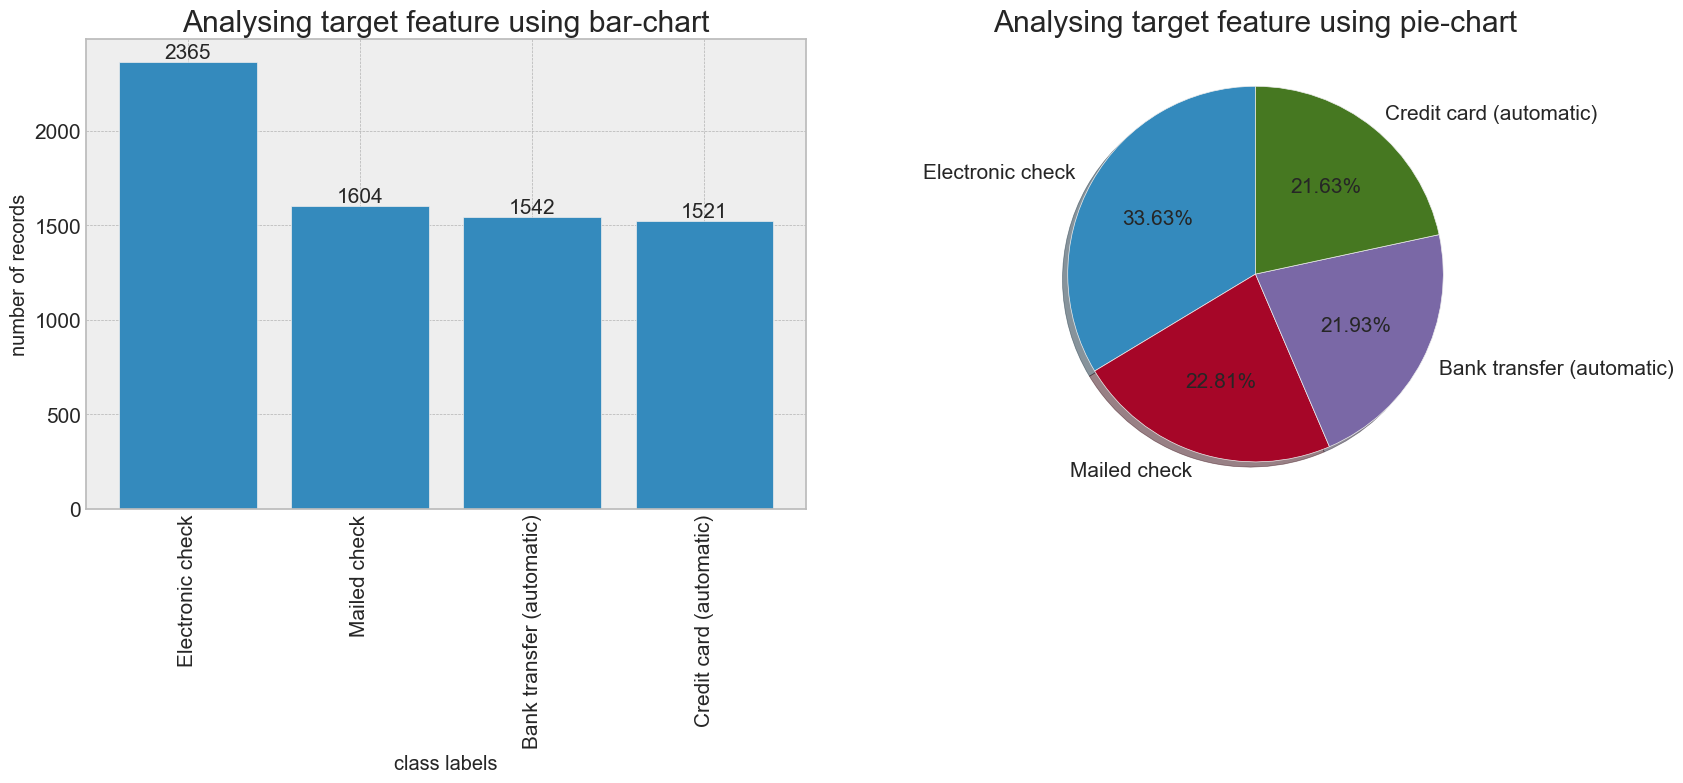

In [33]:
viz_data = dict(df['PaymentMethod'].value_counts())

with plt.style.context(style='bmh'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    plt.rcParams['font.size'] = 15

    bars = axes[0].bar(x=list(viz_data.keys()), height=list(viz_data.values()))

    axes[0].set_title(label='Analysing target feature using bar-chart')
    axes[0].set_xlabel(xlabel='class labels')
    axes[0].set_ylabel(ylabel='number of records')

    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)

    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
    axes[0].tick_params(axis='both', which='both', labelsize=15)
    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True,
                textprops={'fontsize': 15})
    axes[1].set_title(label='Analysing target feature using pie-chart')
    axes[1].tick_params(axis='both', which='both', labelsize=15)

fig.tight_layout()
plt.show()

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Label Encoding**

In [35]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [36]:
df[categorical_features].head(10)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


In [37]:
def label_encoder(column):
    unique_labels = df[column].unique().tolist()
    unique_labels.sort()
    print(unique_labels)
    
    label_dict = {}
    for idx, label in enumerate(unique_labels):
        label_dict[label] = idx
    print(label_dict)
    
    filepath = f"models/label_encoded/{column}_dict.pkl"
    if os.path.exists(filepath):
        os.remove(filepath)
    with open(file=filepath, mode="wb") as file:
        pickle.dump(obj=label_dict, file=file)
    
    return label_dict

In [38]:
gender_dict = label_encoder('gender')
df['gender'] = df['gender'].map(gender_dict)

['Female', 'Male']
{'Female': 0, 'Male': 1}


In [39]:
Partner_dict = label_encoder('Partner')
df['Partner'] = df['Partner'].map(Partner_dict)

['No', 'Yes']
{'No': 0, 'Yes': 1}


In [40]:
Dependents_dict = label_encoder('Dependents')
df['Dependents'] = df['Dependents'].map(Dependents_dict)

['No', 'Yes']
{'No': 0, 'Yes': 1}


In [41]:
PhoneService_dict = label_encoder('PhoneService')
df['PhoneService'] = df['PhoneService'].map(PhoneService_dict)

['No', 'Yes']
{'No': 0, 'Yes': 1}


In [42]:
MultipleLines_dict = label_encoder('MultipleLines')
df['MultipleLines'] = df['MultipleLines'].map(MultipleLines_dict)

['No', 'No phone service', 'Yes']
{'No': 0, 'No phone service': 1, 'Yes': 2}


In [43]:
InternetService_dict = label_encoder('InternetService')
df['InternetService'] = df['InternetService'].map(InternetService_dict)

['DSL', 'Fiber optic', 'No']
{'DSL': 0, 'Fiber optic': 1, 'No': 2}


In [44]:
OnlineSecurity_dict = label_encoder('OnlineSecurity')
df['OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [45]:
OnlineBackup_dict = label_encoder('OnlineBackup')
df['OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [46]:
DeviceProtection_dict = label_encoder('DeviceProtection')
df['DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [47]:
TechSupport_dict = label_encoder('TechSupport')
df['TechSupport'] = df['TechSupport'].map(TechSupport_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [48]:
StreamingTV_dict = label_encoder('StreamingTV')
df['StreamingTV'] = df['StreamingTV'].map(StreamingTV_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [49]:
StreamingMovies_dict = label_encoder('StreamingMovies')
df['StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_dict)

['No', 'No internet service', 'Yes']
{'No': 0, 'No internet service': 1, 'Yes': 2}


In [50]:
Contract_dict = label_encoder('Contract')
df['Contract'] = df['Contract'].map(Contract_dict)

['Month-to-month', 'One year', 'Two year']
{'Month-to-month': 0, 'One year': 1, 'Two year': 2}


In [51]:
PaperlessBilling_dict = label_encoder('PaperlessBilling')
df['PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_dict)

['No', 'Yes']
{'No': 0, 'Yes': 1}


In [52]:
PaymentMethod_dict = label_encoder('PaymentMethod')
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod_dict)

['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [54]:
oversampled_dfs = []

for label in df['Churn'].unique():
    label_df = df.loc[df['Churn'] == label]
    resampled = resample(label_df, n_samples=max(df['Churn'].value_counts()), random_state=seed_value)
    oversampled_dfs.append(resampled)
    
df = pd.concat(objs=oversampled_dfs, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [55]:
df.shape

(10326, 20)

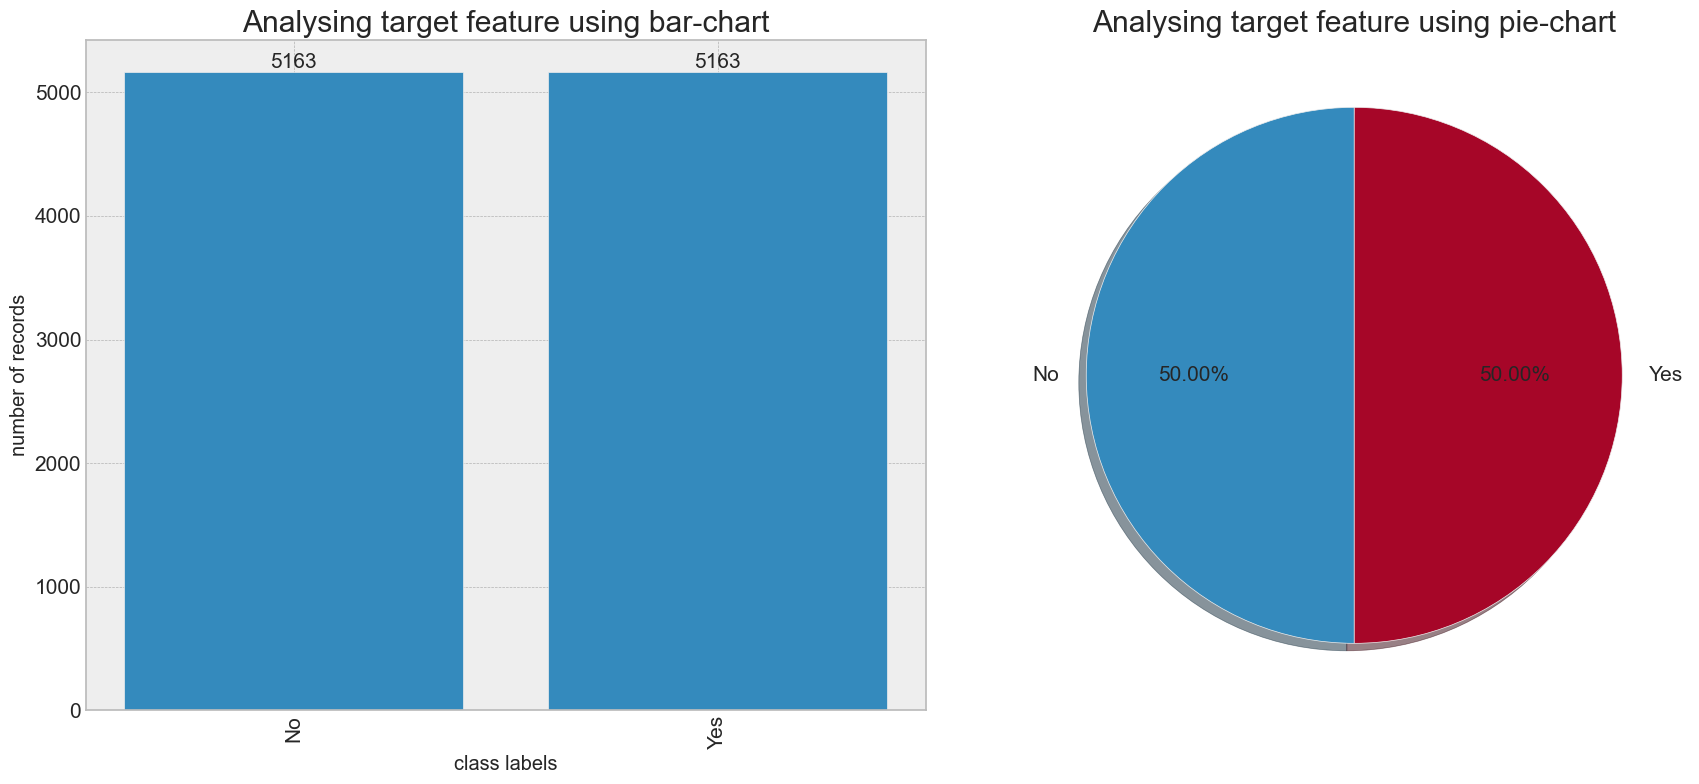

In [56]:
viz_data = dict(df['Churn'].value_counts())

with plt.style.context(style='bmh'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    plt.rcParams['font.size'] = 15

    bars = axes[0].bar(x=list(viz_data.keys()), height=list(viz_data.values()))

    axes[0].set_title(label='Analysing target feature using bar-chart')
    axes[0].set_xlabel(xlabel='class labels')
    axes[0].set_ylabel(ylabel='number of records')

    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)

    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
    axes[0].tick_params(axis='both', which='both', labelsize=15)
    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True,
                textprops={'fontsize': 15})
    axes[1].set_title(label='Analysing target feature using pie-chart')
    axes[1].tick_params(axis='both', which='both', labelsize=15)

fig.tight_layout()
plt.show()

In [57]:
Churn_dict = label_encoder('Churn')
df['Churn'] = df['Churn'].map(Churn_dict)

['No', 'Yes']
{'No': 0, 'Yes': 1}


In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.05,70.05,0
1,0,0,0,0,62,0,1,0,0,2,2,0,0,2,2,1,1,43.60,2748.70,0
2,1,0,0,0,17,1,0,1,0,2,2,0,0,2,0,1,1,90.95,1612.20,0
3,0,0,0,0,57,1,2,1,2,2,2,0,2,2,2,1,0,112.95,6465.00,1
4,0,0,0,0,20,1,0,1,2,0,2,0,2,0,0,1,0,89.40,1871.15,0


In [59]:
X = df.drop(labels='Churn', axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.05,70.05
1,0,0,0,0,62,0,1,0,0,2,2,0,0,2,2,1,1,43.60,2748.70
2,1,0,0,0,17,1,0,1,0,2,2,0,0,2,0,1,1,90.95,1612.20
3,0,0,0,0,57,1,2,1,2,2,2,0,2,2,2,1,0,112.95,6465.00
4,0,0,0,0,20,1,0,1,2,0,2,0,2,0,0,1,0,89.40,1871.15


In [60]:
y = df[['Churn']]
y.head()

,Churn
0,0
1,0
2,0
3,1
4,0


In [61]:
scaler = MinMaxScaler()
scaler = scaler.fit(X.values)
scaled = scaler.transform(X.values)

df = pd.DataFrame(scaled, columns=X.columns)
df['Churn'] = y.values.ravel()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.515423,0.005914,0
1,0.0,0.0,0.0,0.0,0.859155,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.333333,0.252239,0.315013,0
2,1.0,0.0,0.0,0.0,0.225352,1.0,0.0,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.723383,0.183868,0
3,0.0,0.0,0.0,0.0,0.788732,1.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.942289,0.743850,1
4,0.0,0.0,0.0,0.0,0.267606,1.0,0.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.707960,0.213749,0


In [62]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels='Churn', axis=1), df[['Churn']], test_size=0.2, random_state=42, stratify=df[["Churn"]])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8260, 19) (2066, 19) (8260, 1) (2066, 1)


In [64]:
X_train.to_csv('splitted_data/X_train.csv', index=False)
X_test.to_csv('splitted_data/X_test.csv', index=False)
y_train.to_csv('splitted_data/y_train.csv', index=False)
y_test.to_csv('splitted_data/y_test.csv', index=False)

---